[]

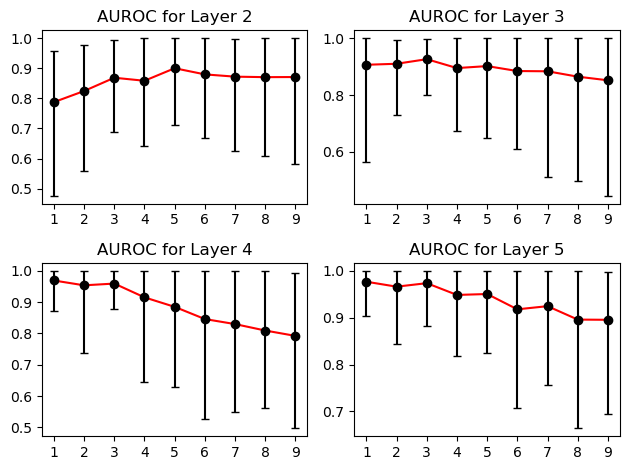

In [58]:
import numpy as np
from matplotlib import pyplot as plt 


#read all lines and crerate plots for each dataset
data = {}
datasets = []
with open("./summary.txt","r") as f:
    for i,line in enumerate(f.readlines()):
        if i==0:
            continue
        layer,p,ds ,auroc = line.split()
        auroc = float(auroc)
        if layer not in data.keys():
            data[layer] = []
        data[layer] += [(p,ds,auroc)]
        datasets += [ds]

datasets = list(set(datasets))


#plot dependence on aggregation for every layer
fig,ax = plt.subplots(2,2)
for i,layer in enumerate(data.keys()):
    x=[]
    y=[]
    for ds in datasets:
        vals = []
        for p,ds2,auroc in data[layer]:
            if ds == ds2:
                vals += [(int(p),auroc)]
        vals = sorted(vals,key = lambda x:x[0])
        xvals = [v[0] for v in vals]
        yvals = [v[1] for v in vals]
        x += xvals
        y += yvals
        #ax[i//2,i%2].plot(xvals,yvals,label=ds,marker = "x")
    x_array=[]
    y_array=[]
    y_errors=[]
    for xval in range(min(x),max(x)+1):
        y_mean = np.mean([b for a,b in zip(x,y) if a == xval])
        y_max = np.max([b for a,b in zip(x,y) if a == xval])
        y_min = np.min([b for a,b in zip(x,y) if a == xval])
        y_array +=[y_mean]
        x_array +=[xval]
        y_errors+=[[y_mean-y_min,y_max-y_mean]]
    y_errors=np.array(y_errors).T
    ax[i//2,i%2].set_title(f"AUROC for Layer {layer}")
    ax[i//2,i%2].errorbar(x_array,y_array,y_errors,fmt="ko", markersize=6,capsize = 3)
    ax[i//2,i%2].plot(x_array,y_array,"r-")
    ax[i//2,i%2].set_xticks(range(1,10))
fig.tight_layout()
plt.plot()